1. Business Understanding

The company is expanding into the aviation industry to diversify its portfolio. Specifically, we’re looking to acquire and operate aircraft for both commercial and private use. 

We shall identify which types of aircraft that pose the lowest risk, analyze various factors such as safety records, maintenance requirements, operational costs, and other risks associated with different aircraft models.

These insights will help them make informed decisions on which aircraft to purchase, minimizing risk and ensuring a successful entry into the aviation market.



Step 1. Loading the data and the relevant packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Aviation_Data.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_40832\1383385705.py:7: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


Step 2. We shall now inspect the data frame, get summary info on it i.e the shhape, the aggregates and missing values

In [13]:
#to get the column data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [14]:
#we shall see the size of the data
df.shape

(90348, 31)

In [15]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [16]:
#We shall get the summary statistics on the columns that have number values.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the above what we can infer from the data the following;

1. We only have 5 columns containing numerical data
2. We have quite a lot of missing values which we shall need to work through to handle effectively.

Step. 3 cleaning the data by viewing the values, column by column

In [17]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [18]:
df[df['Investigation.Type']!='Incident']
# the investigation type column has dates mixed inside it. 71 rows.
#also when loading the data, we got a warning that columns (6,7,28) have mixed data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#we shall create df1 to isolate the errors in the Investigation type and proceed to delete them
df1= df[(df['Investigation.Type']!='Accident') & (df['Investigation.Type']!='Incident')]

#to remove Investigation.Type errors
df_e = df[~df['Investigation.Type'].isin(['Accident', 'Incident'])].index

df.drop(df_e, inplace=True)



In [44]:
print(df['Investigation.Type'].value_counts())
print(df.shape)

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64
(88889, 31)


We have now solved the investigation type errors that had blank rows.
Our df has moved from 90348 rows to 85015 rows

In [47]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          15230
dtype: i

Also, to avoid column by column cleaning, as the interest for our study is the planes to get/not get. Let us proceed to clearing balnks for the plane's make and model


In [59]:
df['Make'].isna().value_counts(normalize=True)

Make
False    0.999291
True     0.000709
Name: proportion, dtype: float64

In [60]:
#We shall filter out rows where 'Make' is NaN
df_emake = df[df['Make'].isna()].index

# Drop rows where the 'Make' column is NaN
df.drop(df_emake, inplace=True)

Now that we've cleaned the make column, we may need to do model as well however I believe that we shall leave it in prior to making any other changes.

In [63]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54466
Longitude                 54475
Airport.Code              38708
Airport.Name              36137
Injury.Severity             983
Aircraft.damage            3176
Aircraft.Category         56551
Registration.Number        1343
Make                          0
Model                        49
Amateur.Built               100
Number.of.Engines          6035
Engine.Type                7045
FAR.Description           56854
Schedule                  76283
Purpose.of.flight          6150
Air.carrier               72202
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12500
Total.Minor.Injuries      11922
Total.Uninjured            5901
Weather.Condition          4454
Broad.phase.of.flight     27113
Report.Status              6352
Publication.Date          15227
dtype: i

The make column has an error whereby values are case changed i.e cessna vs CESSNA, let'start by having everything in caps letters.

In [82]:
df['Make'] = df['Make'].str.upper()
df['Location'] = df['Location'].str.upper()
df['Country'] = df['Country'].str.upper()
df['Airport.Name'] = df['Airport.Name'].str.upper()
df['Air.carrier'] = df['Air.carrier'].str.upper()


We shall also drop some irrelevant columns; 1. Schedule - Too many missing values and not much data, 2. Registration Number - as we may not be buying the specific planes on the list. 3. Country, Location, Airport, Airport code - We do not see a relationship between accidents and the airport/country. 4. Air carrier - Pilots are considered qualified regardless of company(though we may need to simulate for specific cases where a craft crash with NAN carrier yet isn't present with a carrier)

In [83]:
df_dropped = df.drop(columns=['Schedule','Registration.Number','Airport.Name','Country','Airport.Code','Location','FAR.Description','Air.carrier'])

We shall also drop publication date as this corresponds with the event date +1

In [85]:
df_dropped.drop(columns='Publication.Date', inplace=True)

In [87]:
df_dropped.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Latitude', 'Longitude', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

We shall split the data frame into 2; Accident and Incident. As this are the most promominent features in the data. Then continue to clean for a case by case basis

In [88]:
df_accident = df_dropped[df_dropped['Investigation.Type']=='Accident']
df_incident = df_dropped[df_dropped['Investigation.Type']=='Incident']

['108-3',
 'PA24-180',
 '172M',
 '112',
 '501',
 'DC9',
 '180',
 '140',
 '401B',
 'NAVION L-17B',
 'PA-28-161',
 'V35B',
 '17-30A',
 'R172K',
 'A',
 '19',
 '280C',
 '172',
 'WCS-222 (BELL 47G)',
 '152',
 '150L',
 '206L-1',
 'PA-24-180',
 'AA-5B',
 '414A',
 'BE-58',
 'M-5-235C',
 '210L',
 '7GCBC',
 '182',
 'AT-301',
 'PA-34-200T',
 'T337G',
 'PA-28R-200',
 '206',
 'PA-22',
 'PA-31',
 '114',
 'PA-24-250',
 'TR182',
 'A185F',
 '340',
 'SA-316B',
 '35',
 'M-20J',
 'A75',
 '210',
 'V35',
 'C46',
 'PA-28-140',
 'TU206G',
 '172N',
 'ASW 20',
 'P210N',
 'PA-34',
 '305 (L-19)',
 '182A',
 'PA-23-250',
 '23-250',
 'M20G',
 'TU206F',
 '1',
 'U206',
 '210N',
 '310L',
 'L-1011',
 'EMB-110P1',
 '414',
 'P35',
 'AA5B',
 '737-222',
 'PA-28R-201T',
 'A23-24',
 'PA-31-350',
 'T210N',
 '310',
 '269C',
 'SA 226-TC',
 'C-45H',
 'DHC-2-MK3',
 '150M',
 'BD-5B',
 '182P',
 '440',
 'PA-31T',
 'F50',
 '150',
 '180E',
 '170B',
 '206B',
 'C23',
 'PA-28-180',
 '180K',
 'M20F',
 'G35',
 '177B',
 'AA5A',
 'SA226-T(B)'

We shall proceed to generate a pairplot to visualize the relationships in the data, before we delve in deeper.

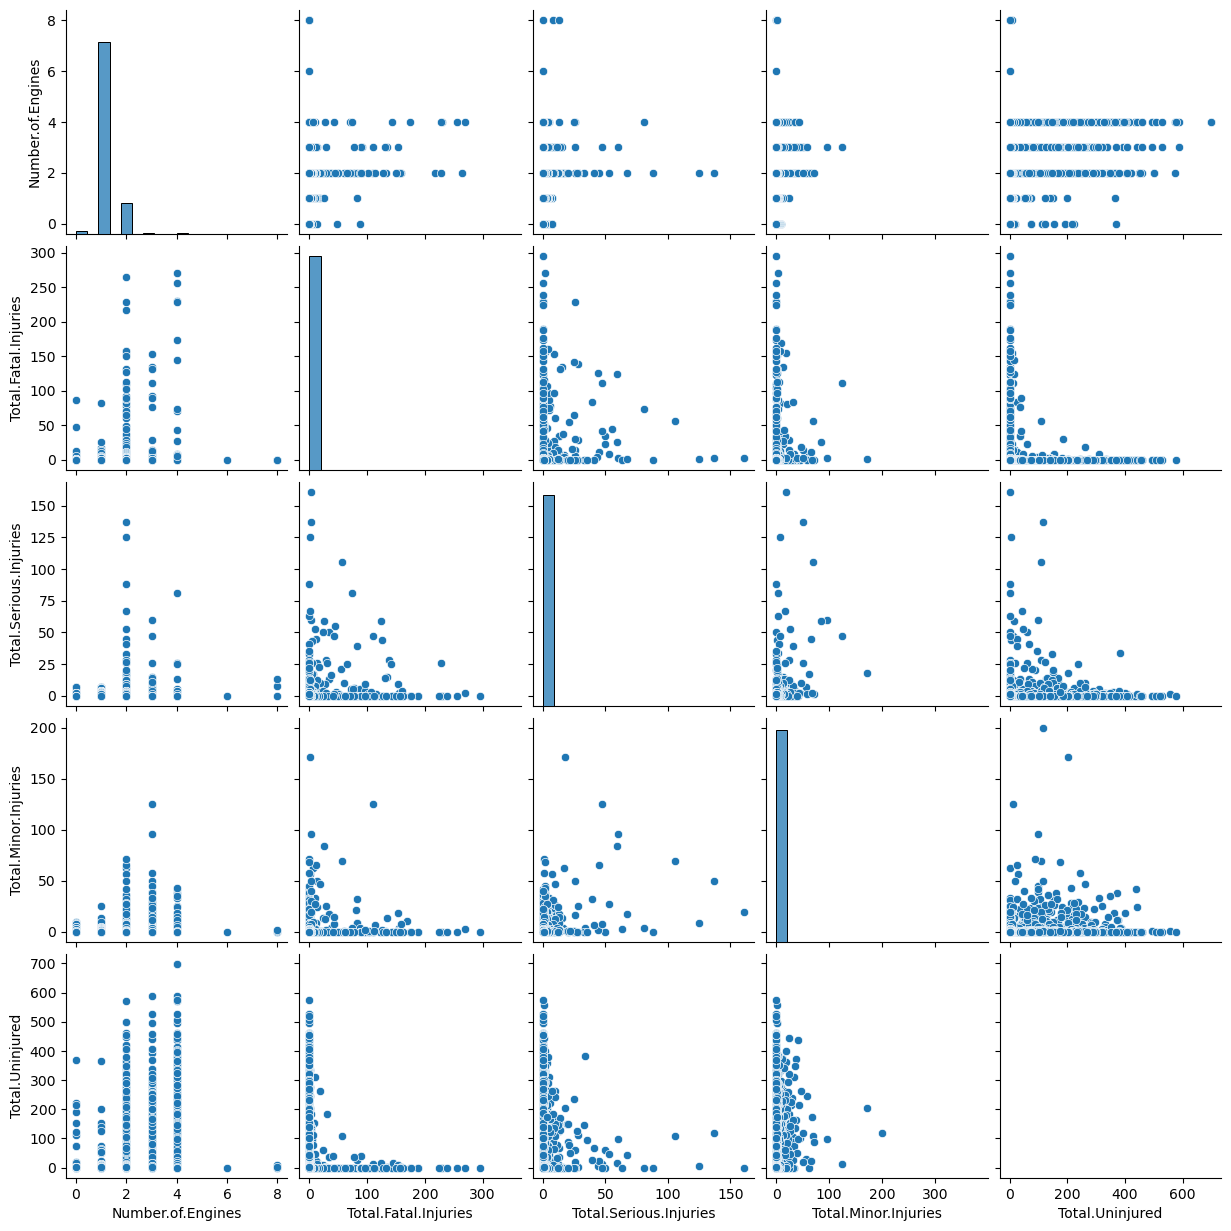

In [64]:
sns.pairplot(df)

Inferences from the above plot;

1. The smaller aircrafts are more prone to accidents; due to the fact that more injuries are occuring on planes with less engines.

We shall now proceed to get the accident/incidence by make